In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

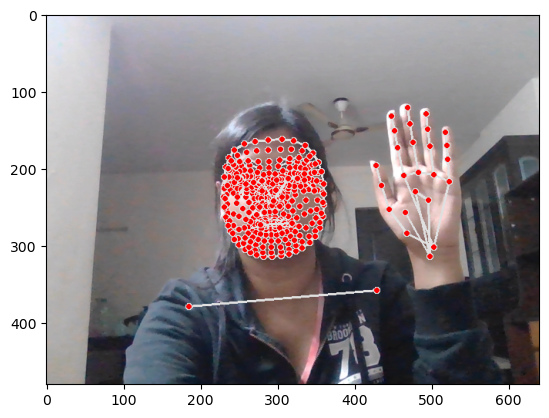

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Step 2

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.46178117,  0.50510371, -0.77455324, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.46178117,  0.50510371, -0.77455324, ...,  0.        ,
        0.        ,  0.        ])

# Step 3

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks','I like It','A','B'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30


In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


# Step 4

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                                        break
                    
    cap.release()
    cv2.destroyAllWindows()


In [24]:
 cap.release()
cv2.destroyAllWindows()

# step 5

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'I like It': 2, 'A': 3, 'B': 4}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(150, 30, 1662)

In [30]:
np.array(labels).shape

(150,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(150, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
y_test.shape

(8, 5)

# step 6

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.callbacks import TensorBoard

In [71]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [119]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))



In [107]:
res = [0.2, 0.5, 0.1, 0.1, 0.1]

In [108]:
actions[np.argmax(res)]

'thanks'

In [120]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [111]:
model.fit(X_train, y_train, epochs=400,  callbacks=[tb_callback])

Epoch 1/400
5/5 [==============================] - 2s 79ms/step - loss: 0.3773 - categorical_accuracy: 0.8521
Epoch 2/400
5/5 [==============================] - 0s 81ms/step - loss: 0.3289 - categorical_accuracy: 0.8451
Epoch 3/400
5/5 [==============================] - 0s 80ms/step - loss: 0.3256 - categorical_accuracy: 0.8380
Epoch 4/400
5/5 [==============================] - 0s 83ms/step - loss: 0.2947 - categorical_accuracy: 0.8592
Epoch 5/400
5/5 [==============================] - 0s 84ms/step - loss: 0.2946 - categorical_accuracy: 0.8662
Epoch 6/400
5/5 [==============================] - 0s 80ms/step - loss: 0.2903 - categorical_accuracy: 0.8732
Epoch 7/400
5/5 [==============================] - 0s 80ms/step - loss: 0.2793 - categorical_accuracy: 0.8592
Epoch 8/400
5/5 [==============================] - 0s 81ms/step - loss: 0.2805 - categorical_accuracy: 0.8662
Epoch 9/400
5/5 [==============================] - 0s 80ms/step - loss: 0.2800 - categorical_accuracy: 0.8803
Epoch 10/4

5/5 [==============================] - 0s 81ms/step - loss: 0.2958 - categorical_accuracy: 0.8803
Epoch 75/400
5/5 [==============================] - 0s 79ms/step - loss: 0.5198 - categorical_accuracy: 0.7817
Epoch 76/400
5/5 [==============================] - 0s 82ms/step - loss: 0.8771 - categorical_accuracy: 0.6972
Epoch 77/400
5/5 [==============================] - 0s 80ms/step - loss: 0.5194 - categorical_accuracy: 0.8169
Epoch 78/400
5/5 [==============================] - 0s 81ms/step - loss: 0.5174 - categorical_accuracy: 0.8099
Epoch 79/400
5/5 [==============================] - 0s 82ms/step - loss: 0.5282 - categorical_accuracy: 0.8099
Epoch 80/400
5/5 [==============================] - 0s 81ms/step - loss: 0.3693 - categorical_accuracy: 0.8944
Epoch 81/400
5/5 [==============================] - 0s 80ms/step - loss: 0.3076 - categorical_accuracy: 0.9014
Epoch 82/400
5/5 [==============================] - 0s 81ms/step - loss: 0.2733 - categorical_accuracy: 0.9085
Epoch 83/400
5

5/5 [==============================] - 0s 78ms/step - loss: 0.1422 - categorical_accuracy: 0.9507
Epoch 148/400
5/5 [==============================] - 0s 82ms/step - loss: 0.1274 - categorical_accuracy: 0.9577
Epoch 149/400
5/5 [==============================] - 0s 82ms/step - loss: 0.1388 - categorical_accuracy: 0.9437
Epoch 150/400
5/5 [==============================] - 0s 82ms/step - loss: 0.1452 - categorical_accuracy: 0.9718
Epoch 151/400
5/5 [==============================] - 0s 78ms/step - loss: 0.1966 - categorical_accuracy: 0.9437
Epoch 152/400
5/5 [==============================] - 0s 81ms/step - loss: 0.1477 - categorical_accuracy: 0.9437
Epoch 153/400
5/5 [==============================] - 0s 81ms/step - loss: 0.1335 - categorical_accuracy: 0.9507
Epoch 154/400
5/5 [==============================] - 0s 80ms/step - loss: 0.1345 - categorical_accuracy: 0.9507
Epoch 155/400
5/5 [==============================] - 0s 80ms/step - loss: 0.1350 - categorical_accuracy: 0.9507
Epoch 

5/5 [==============================] - 0s 81ms/step - loss: 0.2428 - categorical_accuracy: 0.9085
Epoch 221/400
5/5 [==============================] - 0s 82ms/step - loss: 0.2321 - categorical_accuracy: 0.9366
Epoch 222/400
5/5 [==============================] - 0s 82ms/step - loss: 0.1909 - categorical_accuracy: 0.9507
Epoch 223/400
5/5 [==============================] - 0s 80ms/step - loss: 0.2029 - categorical_accuracy: 0.9366
Epoch 224/400
5/5 [==============================] - 0s 79ms/step - loss: 0.1594 - categorical_accuracy: 0.9718
Epoch 225/400
5/5 [==============================] - 0s 79ms/step - loss: 0.1497 - categorical_accuracy: 0.9718
Epoch 226/400
5/5 [==============================] - 0s 80ms/step - loss: 0.1402 - categorical_accuracy: 0.9507
Epoch 227/400
5/5 [==============================] - 0s 81ms/step - loss: 0.1329 - categorical_accuracy: 0.9648
Epoch 228/400
5/5 [==============================] - 0s 85ms/step - loss: 0.1230 - categorical_accuracy: 0.9648
Epoch 

5/5 [==============================] - 0s 81ms/step - loss: 0.2059 - categorical_accuracy: 0.9437
Epoch 294/400
5/5 [==============================] - 0s 80ms/step - loss: 0.4070 - categorical_accuracy: 0.8732
Epoch 295/400
5/5 [==============================] - 0s 80ms/step - loss: 0.2235 - categorical_accuracy: 0.9155
Epoch 296/400
5/5 [==============================] - 0s 81ms/step - loss: 0.1651 - categorical_accuracy: 0.9577
Epoch 297/400
5/5 [==============================] - 0s 82ms/step - loss: 0.1520 - categorical_accuracy: 0.9296
Epoch 298/400
5/5 [==============================] - 0s 82ms/step - loss: 0.1020 - categorical_accuracy: 0.9718
Epoch 299/400
5/5 [==============================] - 0s 80ms/step - loss: 0.1082 - categorical_accuracy: 0.9648
Epoch 300/400
5/5 [==============================] - 0s 81ms/step - loss: 0.0768 - categorical_accuracy: 0.9789
Epoch 301/400
5/5 [==============================] - 0s 79ms/step - loss: 0.0826 - categorical_accuracy: 0.9789
Epoch 

5/5 [==============================] - 0s 81ms/step - loss: 0.0302 - categorical_accuracy: 0.9930
Epoch 367/400
5/5 [==============================] - 0s 80ms/step - loss: 0.0348 - categorical_accuracy: 0.9930
Epoch 368/400
5/5 [==============================] - 0s 80ms/step - loss: 0.0324 - categorical_accuracy: 0.9930
Epoch 369/400
5/5 [==============================] - 0s 80ms/step - loss: 0.0265 - categorical_accuracy: 0.9930
Epoch 370/400
5/5 [==============================] - 0s 80ms/step - loss: 0.0343 - categorical_accuracy: 0.9930
Epoch 371/400
5/5 [==============================] - 0s 80ms/step - loss: 0.0308 - categorical_accuracy: 0.9930
Epoch 372/400
5/5 [==============================] - 0s 79ms/step - loss: 0.0551 - categorical_accuracy: 0.9859
Epoch 373/400
5/5 [==============================] - 0s 81ms/step - loss: 0.0351 - categorical_accuracy: 0.9930
Epoch 374/400
5/5 [==============================] - 0s 81ms/step - loss: 0.0376 - categorical_accuracy: 0.9930
Epoch 

In [112]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_23 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_24 (LSTM)              (None, 30, 128)           131584    
                                                                 
 lstm_25 (LSTM)              (None, 64)                49408     
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 32)               

# step 7

In [113]:
res = model.predict(X_test)

1/1 [==============================] - 1s 733ms/step


In [114]:
actions[np.argmax(res[4])]

'I like It'

In [115]:
actions[np.argmax(y_test[4])]

'I like It'

In [116]:
model.save('action.h5')

C:\Users\VARSHA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
del model

In [121]:
model.load_weights('action.h5')

# step 8

In [122]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [123]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 772ms/step


In [124]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [125]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 1]],

       [[7, 0],
        [0, 1]],

       [[6, 0],
        [0, 2]],

       [[5, 0],
        [0, 3]],

       [[7, 0],
        [0, 1]]], dtype=int64)

In [126]:
accuracy_score(ytrue, yhat)

1.0

# step 9

In [127]:
colors = [(245,117,16), (117,245,16), (16,117,245), (255,0,0), (0,255,0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, (action, prob) in enumerate(zip(actions, res)):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, f"{action}: {prob:.2f}", (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    return output_frame

In [93]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [94]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [131]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
                    
            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'media

1/1 [==============================] - 0s 30ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
I like It
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
I like It
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
I like It
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
I like It
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
I like It
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
I like It
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
I like It
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
I li

In [130]:
cap.release()
cv2.destroyAllWindows()

In [65]:
res[np.argmax(res)] > threshold

True

In [66]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))